<a href="https://colab.research.google.com/github/jung-youjin/dip-pillow/blob/main/colab/(%EC%B0%90)FinalCode_NEW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Selenium
# 우리 input값 받아오기
# 일치 체크박스
# EasyOCR
# 우선 지금 전처리 필터로 다른 사진 적용해보기
# 이미지 전처리 필터 찾기&적용 


# -----------------------------------대충 전처리까지 완료

# 해야 할 일
# Selenium
# 전체 값: 0 ==> 사진 재촬영 요구
# 전체 값: 1 ==> 첫번째 링크 열어서 텍스트 보여주기
# 전체 값: n ==> 약학정보원 정보 제공 (--> 이렇게 할 건지, 결과 하나 나오거나 맨 위의 결과가 정답인 알약으로 추려서 테스트 할 건지 고민해보기!)


# 딥러닝 기반 알약 자동 분류 및 정보 제공 시스템
> **Digital Image Processing 설계 프로젝트**<br>
> 2조 <br>
> 1772029 윤소진<br>
> 1772042 정유진<br>
> 1772146 백지원<br>



- **1개의 알약**을 정확히 Detect하고 싶은 경우
  - 1개 알약 **앞면, 뒷면** 총 **2회** 촬영
- **여러개의 알약**을 Detect하고 싶은 경우
  - 알약 여러개 동시 총 **1회** 촬영

프로그램 실행을 위한 준비 단계

In [ ]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15069, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 15069 (delta 1), reused 3 (delta 0), pack-reused 15056
Receiving objects: 100% (15069/15069), 13.44 MiB | 12.27 MiB/s, done.
Resolving deltas: 100% (10235/10235), done.


In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

/content/darknet


In [ ]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


In [ ]:
# make darknet (builds darknet so that you can then use the darknet executable file to run or train object detectors)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:935:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1136:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
  

In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [ ]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/content
Mounted at /content/gdrive


In [ ]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/MyDrive/ /mydrive
!ls /mydrive

 모아놓기		 Dip프로젝트		   'My Drive'
 annotations		 DIP프로젝트		   '반도체공학 기말필기.pdf'
 chart.png		'DIP 기술 관련 자료.gdoc'   yolov4
 chart_yolov4-obj.png	 imag			    yolov4.weights
'Colab Notebooks'	 images
'Colab Yolo 정리.gdoc'	 MyDrive


In [ ]:
#!./darknet detector test data/obj.data cfg/yolov4-obj.cfg /mydrive/yolov4/backup/yolov4-obj_last.weights /mydrive/yolov4/testImg/testImg3.jpg -thresh 0.3#

# Object Detection
**yolov4**


In [ ]:
%cd /content/
!git clone https://github.com/jung-youjin/yolov4-custom-functions.git

/content
Cloning into 'yolov4-custom-functions'...
remote: Enumerating objects: 241, done.
remote: Total 241 (delta 0), reused 0 (delta 0), pack-reused 241
Receiving objects: 100% (241/241), 62.01 MiB | 21.04 MiB/s, done.
Resolving deltas: 100% (113/113), done.


In [ ]:
%cd yolov4-custom-functions/

/content/yolov4-custom-functions


In [ ]:
# TensorFlow GPU
!pip install -r requirements-gpu.txt

     |████████████████████████████████| 320.4MB 36kB/s 
     |████████████████████████████████| 28.7MB 112kB/s 
     |████████████████████████████████| 20.1MB 1.5MB/s 
     |████████████████████████████████| 3.0MB 33.0MB/s 
     |████████████████████████████████| 460kB 29.8MB/s 
     |████████████████████████████████| 2.9MB 34.3MB/s 
  Created wheel for pytesseract: filename=pytesseract-0.3.7-py2.py3-none-any.whl size=13953 sha256=2a418ddb33022fd7d1aeb3779b123df9918f1c826f433fd8428568e6d3d2b0e4
  Stored in directory: /root/.cache/pip/wheels/81/20/7e/1dd0daad1575d5260916bb1e9781246430647adaef4b3ca3b3
Successfully built pytesseract
ERROR: tensorflow 2.5.0 has requirement gast==0.4.0, but you'll have gast 0.3.3 which is incompatible.
ERROR: tensorflow 2.5.0 has requirement h5py~=3.1.0, but you'll have h5py 2.10.0 which is incompatible.
ERROR: tensorflow 2.5.0 has requirement numpy~=1.19.2, but you'll have numpy 1.18.5 which is incompatible.
ERROR: tensorflow 2.5.0 has requirement tensorbo

In [ ]:
%cd /content

/content


In [ ]:
# weight를 /yolov4-custom-functions/data 에 불러오기
!cp /mydrive/yolov4/backup/yolov4-obj_last.weights ./yolov4-custom-functions/data

In [ ]:
# crop할 더미 이미지 data folder에 불러오기
!cp /mydrive/yolov4/testImg/testImg555.JPG ./yolov4-custom-functions/data/images

In [ ]:
%cd /content/yolov4-custom-functions/data/classes
!rm coco.names
%cd /content

/content/yolov4-custom-functions/data/classes
/content


In [ ]:
# yolov4 label - pill로 변경
!cp /mydrive/yolov4/obj.names /content/yolov4-custom-functions/data/classes/coco.names
%cd /content/yolov4-custom-functions

/content/yolov4-custom-functions


## 사전에 미리 학습된 yolov4 weight 불러오기

In [ ]:
# coco.names - pill
!python save_model.py --weights ./data/yolov4-obj_last.weights --output ./checkpoints/yolov4-416 --input_size 416 --model yolov4 

2021-06-04 17:36:40.133617: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2021-06-04 17:36:41.667064: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2021-06-04 17:36:41.724498: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-06-04 17:36:41.725301: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla K80 computeCapability: 3.7
coreClock: 0.8235GHz coreCount: 13 deviceMemorySize: 11.17GiB deviceMemoryBandwidth: 223.96GiB/s
2021-06-04 17:36:41.725345: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2021-06-04 17:36:41.971641: I tensorflow/stream_executor/platform/defa

필요한 패키지 설치

In [ ]:
# 필요한 패키지 설치
!pip install easyocr --no-deps # Colab already has all dependencies
!pip install python-bidi
import easyocr
reader = easyocr.Reader(['en'])
!pip install Selenium
!apt-get update # to update ubuntu to correctly run apt install
!pip install requests
!pip install beautifulsoup4
!apt install chromium-chromedriver

     |████████████████████████████████| 63.2MB 44kB/s 


     |████████████████████████████████| 911kB 2.8MB/s 
Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:10 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:12 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:13 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease [15.9 kB]
Get:14 http://archive.ubuntu

알약이 1개인 경우

알약의 개수를 입력해주세요: 1
/content/yolov4-custom-functions
/content/yolov4-custom-functions/data/images/test


Saving IMG_3936.JPG to IMG_3936.JPG
User uploaded file "IMG_3936.JPG" with length 1835127 bytes
IMG_3936.JPG


Saving IMG_3935.JPG to IMG_3935.JPG
User uploaded file "IMG_3935.JPG" with length 1814659 bytes
IMG_3935.JPG
/content/yolov4-custom-functions
/content/yolov4-custom-functions
3 ['pill_3.png', 'pill_1.png', 'pill_2.png']


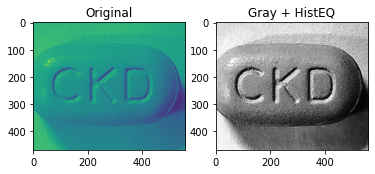

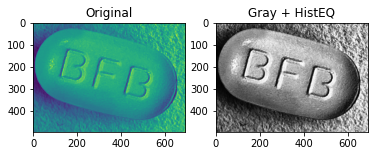

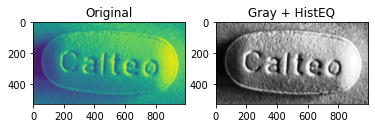

/content/yolov4-custom-functions
mkdir: cannot create directory ‘/content/opencv-testImg-back’: File exists
1 ['pill_1.png']


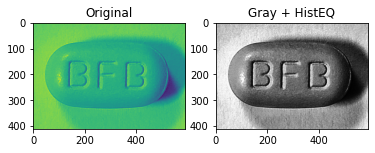

mkdir: cannot create directory ‘/content/ocr-1’: File exists
4 ['pill_3_histeq.png', 'pill_1_histeq.png', 'pill_1_histeq_back.png', 'pill_2_histeq.png']
/content/ocr-1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:131: DeprecationWarning: use options instead of chrome_options



 CKD


 BFB


-------------------- 알약 자동 인식 결과 정보 제공 ---------------------------


 >>  벤포벨정
Ascorbic Acid Coated　52.1mg 외 15


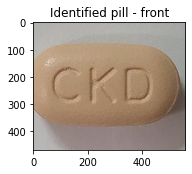

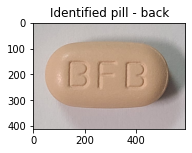



-------- 검색된 벤포벨정
Ascorbic Acid Coated　52.1mg 외 15의 약학정보원 결과값 ---------------------------------


BFB / CKD
제품명 벤포벨정 Benfobell Tab.
등록
(2016-03-07) BFB CKD
성분 / 함량
동일성분 의약품
Ascorbic Acid Coated　제피아스코르브산　52.1mg
Benfotiamine　벤포티아민　100mg (티아민염산염(으)로서 72.3mg)
Biotin　비오틴　10μg
Calcium Pantothenate　판토텐산칼슘　5mg
Cholecalciferol Gr.　콜레칼시페롤과립　10mg (비타민D(으)로서 1,000IU)
Cyanocobalamin(1000倍散)　시아노코발라민1000배산　100mg
Folic Acid　폴산　10μg
Inositol　이노시톨　50mg
Nicotinamide　니코틴산아미드　10mg
Pyridoxine Hydrochloride　피리독신염산염　100mg
Riboflavin　리보플라빈　100mg
Tocopherol Acetate 50%　토코페롤아세테이트2배산　40mg
Ubidecarenone　유비데카레논　2mg
Ursodeoxycholic Acid　우르소데옥시콜산　30mg
Zinc Oxide　산화아연　30mg (아연(으)로서 24mg)
γ-Oryzanol　γ-오리자놀　5mg
첨가제
첨가제 더보기
경질무수규산
미결정셀룰로오스
바닐라미크론









전문 / 일반 일반 단일 / 복합 복합
제조 / 수입사 종근당
제형 정제 투여경로 경구(내용고형)
성상 황갈색의 장방형 필름코팅정
허가일 2015년 12월 15일
대조 / 생동 해당 없음
급여정보 비급여
ATC 코드 A11JC : VITAMINS, OTHER COMBINATIONS
식약처 분류 기타의 비타민제 (319)
KPIC 약효분류
Ascorbic Acid Coated : 비타민 및 영양제류 > 수용성 비타민 > 비타민C 제제
Benfotiamine : 비타민 및 영양제

In [ ]:
# special case (if == 1)

search = input("알약의 개수를 입력해주세요: ")

if search == '1':
  %cd /content/yolov4-custom-functions
  !rm -rf /content/yolov4-custom-functions/data/images/test

  !mkdir ./data/images/test
  %cd ./data/images/test
  from google.colab import files

  uploaded = files.upload()
  filename = ""
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    filename = fn
  print(filename)

  uploaded = files.upload()
  filename1 = ""
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    filename1 = fn
  print(filename1)

  # 아무파일 업로드하면 알아서 파일명 변경해주고 알아서 처리함...  

  !mv $filename testImg.jpg
  !mv $filename1 testImg_back.jpg

  %cd /content/yolov4-custom-functions/
  !python detect.py --weights ./checkpoints/yolov4-416 --size 416 --model yolov4 --images ./data/images/test/testImg.jpg --crop
  !python detect.py --weights ./checkpoints/yolov4-416 --size 416 --model yolov4 --images ./data/images/test/testImg_back.jpg --crop

  import cv2
  import numpy as np
  from matplotlib import pyplot as plt
  import os

  %cd /content/yolov4-custom-functions/
  !mkdir /content/opencv-testImg
  !cp -r /content/yolov4-custom-functions/detections/crop/testImg/*.png /content/opencv-testImg

  path = '/content/opencv-testImg'
  file_list = os.listdir('/content/opencv-testImg/')
  print(len(file_list), file_list)

  for i in range(1,len(file_list)+1):
    img = cv2.imread('/content/opencv-testImg/pill_%s.png' %i, cv2.IMREAD_GRAYSCALE) #여기 경로 바꾸기
    img_enhanced = cv2.equalizeHist(img)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    cl1=clahe.apply(img_enhanced)
    plt.subplot(121),plt.imshow(img),plt.title('Original')
    plt.subplot(122),plt.imshow(cl1, cmap='gray'),plt.title('Gray + HistEQ')
    plt.show()

    save = plt.imsave('pill_%s_histeq.png' %i, cl1, cmap='gray')

  %cd /content/yolov4-custom-functions/
  !mkdir /content/opencv-testImg-back
  !cp -r /content/yolov4-custom-functions/detections/crop/testImg_back/*.png /content/opencv-testImg-back

  path = '/content/opencv-testImg-back'
  file_list = os.listdir('/content/opencv-testImg-back/')
  print(len(file_list), file_list)

  for i in range(1,len(file_list)+1):
    img = cv2.imread('/content/opencv-testImg-back/pill_%s.png' %i, cv2.IMREAD_GRAYSCALE) #여기 경로 바꾸기
    img_enhanced = cv2.equalizeHist(img)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    cl1=clahe.apply(img_enhanced)
    plt.subplot(121),plt.imshow(img),plt.title('Original')
    plt.subplot(122),plt.imshow(cl1, cmap='gray'),plt.title('Gray + HistEQ')
    plt.show()

    save = plt.imsave('pill_%s_histeq_back.png' %i, cl1, cmap='gray')

  !mkdir /content/ocr-1
  !cp -r /content/yolov4-custom-functions/*.png /content/ocr-1
  !rm /content/yolov4-custom-functions/*.png

  # Doing OCR. Get bounding boxes.
  import os
  from google.colab.patches import cv2_imshow

  import matplotlib.image as mpimg
  from PIL import Image

  path = '/content/ocr-1'
  file_list = os.listdir('/content/ocr-1')
  print(len(file_list), file_list)
  %cd /content/ocr-1/

  f = open("/content/input.txt", 'w')
  f = open("/content/input.txt", 'a')
  filename = "pill_1_histeq.png"
  bounds = reader.readtext(filename)
  for j in range(0,len(bounds)):
    data = bounds[j][1]
    data1 = data.replace(" ","")
    f.write(data1)
  f.write("\n")
  filename = "pill_1_histeq_back.png"
  bounds = reader.readtext(filename)
  for j in range(0,len(bounds)):
    data = bounds[j][1]
    data1 = data.replace(" ","")
    f.write(data1)
  f.write("\n")

  f.close()


  from selenium import webdriver
  from urllib.request import urlopen
  from bs4 import BeautifulSoup as bs
  from urllib.parse import quote_plus
  from selenium.webdriver.common.keys import Keys
  import time
  import requests

  url = 'https://www.health.kr/searchIdentity/search.asp'

  chrome_options = webdriver.ChromeOptions()
  chrome_options.add_argument('--headless')
  chrome_options.add_argument('--no-sandbox')
  chrome_options.add_argument('--disable-dev-shm-usage')
  driver = webdriver.Chrome('chromedriver', chrome_options=chrome_options)
  driver.get(url)

  response = requests.get(url)
  soup = bs(response.text, "html.parser")
  searches = soup.select('a')

  box = driver.find_element_by_xpath('//*[@id="drug_print_front"]')
  txtfile = open("/content/input.txt", 'r')
  driver.get(url)
  response = requests.get(url)
  soup = bs(response.text, "html.parser")
  searches = soup.select('a')

  line = txtfile.readline()
  box = driver.find_element_by_xpath('//*[@id="drug_print_front"]')
  print("\n", line)
  name = line.replace("\n","")
  box = box.send_keys(name)

  line1 = txtfile.readline()
  box1 = driver.find_element_by_xpath('//*[@id="drug_print_back"]')
  print("\n", line1)
  name1 = line1.replace("\n","")
  box1 = box1.send_keys(name1)

  checkbox = driver.find_element_by_xpath('//*[@id="frm"]/fieldset/table/tbody/tr[1]/td[1]/ul/li[1]/div/label')
  checkbox.click()
  checkbox1 = driver.find_element_by_xpath('//*[@id="frm"]/fieldset/table/tbody/tr[1]/td[1]/ul/li[2]/div/label')
  checkbox1.click()

  searchButton = driver.find_element_by_xpath('//*[@id="btn_idfysearch"]').click() 
      
  driver.implicitly_wait(15) # wait for loading 10seconds

  searchNum = driver.find_element_by_xpath('//*[@id="idfy_total_cnt_view"]')
  driver.implicitly_wait(5) # wait for loading 10seconds
  # print('search 결과값 갯수: ' + searchNum.text)
  searchNumText = searchNum.text
  
  inc = 1
  print("\n-------------------- 알약 자동 인식 결과 정보 제공 ---------------------------\n")

  pillInfo = driver.find_element_by_xpath('/html/body/div[1]/section/section/section/article[2]/article/table[1]/tbody/tr[3]/td[7]')
  line = pillInfo.text
  print("\n >> ", line)
  if(line == " " or line == "" or line == "\n" or line1 == " " or line1 == "" or line1 == "\n"):
    print("알약 내 문자를 인식하지 못했습니다\n")
    print("Failed to detect text on the identified pill\n")

  img = cv2.imread('/content/opencv-testImg/pill_%s.png' %inc, cv2.IMREAD_COLOR) #여기 경로 바꾸기
  imgFile = 'pill_' + str(inc) + '.png'

  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  plt.subplot(121),plt.imshow(img),plt.title('Identified pill - front')
  plt.show()

  img = cv2.imread('/content/opencv-testImg-back/pill_%s.png' %inc, cv2.IMREAD_COLOR) #여기 경로 바꾸기
  imgFile = 'pill_' + str(inc) + '.png'

  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  plt.subplot(122),plt.imshow(img),plt.title('Identified pill - back')
  plt.show()


  if (searchNumText == "0" or searchNumText == "24306"):
    print("\n-------- 검색된 결과값이 없습니다 --------------\n")
    print("\n***************************************")
    print("\n********* 다시 촬영해 주세요 **********\n")
    print("***************************************\n")
    print("\n----------------------------------------------------------\n")

  else:
    result = driver.find_element_by_xpath('/html/body/div[1]/section/section/section/article[2]/article/table[1]/tbody/tr[3]/td[2]')
    pillName = line.rstrip("\n")
    print("\n\n-------- 검색된 %s의 약학정보원 결과값 ---------------------------------\n\n" %pillName)
    print(result.text) #엔터
    page = driver.find_element_by_xpath('/html/body/div[1]/section/section/section/article[2]/article/table[1]/tbody/tr[3]/td[7]').click()
    detail = driver.find_element_by_xpath('/html/body/div[1]/section/section/section/article[1]/div/a[1]').click()
    table = driver.find_element_by_xpath('/html/body/div[2]/section/section/section/article[1]/table')
    print(table.text)
    print("\n----------------------------------------------------------\n")




In [ ]:
# 재실행 경우
%cd /content/yolov4-custom-functions/
!rm -rf ./data/images/test

/content/yolov4-custom-functions


인식 원하는 이미지 파일 Upload

In [ ]:
# 직접 찍은 알약으로 image upload
!mkdir ./data/images/test
%cd ./data/images/test
from google.colab import files

uploaded = files.upload()
filename = ""
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  filename = fn
print(filename)

# 아무파일 업로드하면 알아서 파일명 변경해주고 알아서 처리함...  
!mv $filename testImg.jpg

/content/yolov4-custom-functions/data/images/test


Saving threepills_new.jpg to threepills_new.jpg
User uploaded file "threepills_new.jpg" with length 3093336 bytes
threepills_new.jpg


# Image Segmentation
**yolov4**


In [ ]:
# testImg.jpg crop 
%cd /content/yolov4-custom-functions/
!python detect.py --weights ./checkpoints/yolov4-416 --size 416 --model yolov4 --images ./data/images/test/testImg.jpg --crop

/content/yolov4-custom-functions


## Crop & Save된 이미지 확인하기

3 ['pill_3.png', 'pill_1.png', 'pill_2.png']


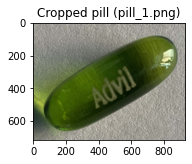

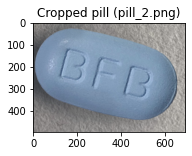

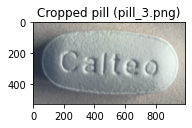

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os

path = '/content/yolov4-custom-functions/detections/crop/testImg'
file_list = os.listdir('/content/yolov4-custom-functions/detections/crop/testImg/')
print(len(file_list), file_list)

for i in range(1,len(file_list)+1):
  img = cv2.imread('/content/yolov4-custom-functions/detections/crop/testImg/pill_%s.png' %i, cv2.IMREAD_COLOR) #여기 경로 바꾸기
  imgFile = 'pill_' + str(i) + '.png'

  plotNum = 121
  plt.subplot(plotNum),plt.imshow(img),plt.title('Cropped pill (%s)' %imgFile)
  plt.show()
  plotNum = plotNum + 1

*test data 수집용*

- 테스트 성공하면 그 이미지파일 직접 **google drive** `yolov4/testImg/Test` 에 업로드 부탁합니다
- 테스트 실패하면 그 이미지파일 직접 **google drive**`yolov4/testImg/안되는 약`에 업로드부탁합니다

# Image Preprocessing

## Image Enhancement Filtering

### 영상 Gray scale 변환


### Contrast Limited Adaptive Histogram Equalization 기법

/content/yolov4-custom-functions
mkdir: cannot create directory ‘/content/opencv-testImg’: File exists
3 ['pill_3.png', 'pill_1.png', 'pill_2.png']


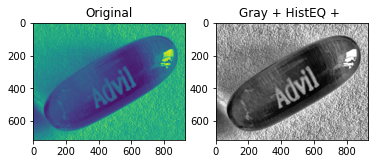

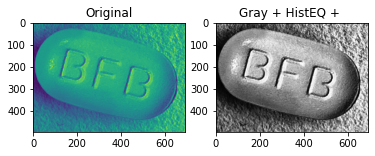

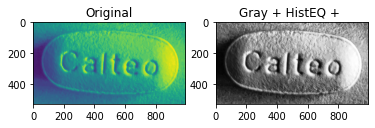

In [ ]:
%cd /content/yolov4-custom-functions/
!mkdir /content/opencv-testImg
!cp -r /content/yolov4-custom-functions/detections/crop/testImg/*.png /content/opencv-testImg

import cv2
import numpy as np
from matplotlib import pyplot as plt
import os

path = '/content/opencv-testImg'
file_list = os.listdir('/content/opencv-testImg/')
print(len(file_list), file_list)

for i in range(1,len(file_list)+1):
  img = cv2.imread('/content/opencv-testImg/pill_%s.png' %i, cv2.IMREAD_GRAYSCALE) #여기 경로 바꾸기
  img_enhanced = cv2.equalizeHist(img)
  clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
  cl1=clahe.apply(img_enhanced)
  #blur5 = cv2.bilateralFilter(img_enhanced, 5,75,75)
  #kernel_sharpen_3 = np.array([[-1,-1,-1,-1,-1],[-1,2,2,2,-1],[-1,2,8,2,-1],[-1,2,2,2,-1],[-1,-1,-1,-1,-1]])/8.0
  #output_1 = cv2.filter2D(cl1,-1,kernel_sharpen_3)
  plt.subplot(121),plt.imshow(img),plt.title('Original')
  plt.subplot(122),plt.imshow(cl1, cmap='gray'),plt.title('Gray + HistEQ + ')
  plt.show()

  save = plt.imsave('pill_%s_histeq.png' %i, cl1, cmap='gray')

!mkdir /content/ocr
!cp -r /content/yolov4-custom-functions/*.png /content/ocr
!rm /content/yolov4-custom-functions/*.png

# Optical Character Recognition

**EasyOCR**

### 전처리된 이미지로부터 문자 인식

In [ ]:
# Doing OCR. Get bounding boxes.
import os
from google.colab.patches import cv2_imshow

import matplotlib.image as mpimg
from PIL import Image

path = '/content/ocr'
file_list = os.listdir('/content/ocr')
print(len(file_list), file_list)
%cd /content/ocr/

f = open("/content/input.txt", 'w')
f = open("/content/input.txt", 'a')
for i in range(1,len(file_list)+1):
  print(i)
  filename = "pill_%s_histeq.png" % i
  bounds = reader.readtext(filename)
  for j in range(0,len(bounds)):
    data = bounds[j][1]
    data1 = data.replace(" ","")
    f.write(data1)
    print
  f.write("\n")
f.close()

3 ['pill_3_histeq.png', 'pill_1_histeq.png', 'pill_2_histeq.png']
/content/ocr
1
2
3




---



---



---



# Web Crawling




**Selenium**

## 약학정보원을 통해 알약 정보 제공

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: DeprecationWarning: use options instead of chrome_options



-------------------- 알약 자동 인식 결과 정보 제공 ---------------------------


 >>  Advil



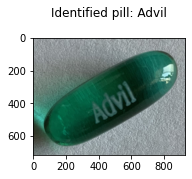



-------- 검색된 Advil의 약학정보원 결과값 ---------------------------------


Advil
제품명 애드빌리퀴겔연질캡슐 Advil Liqui-Gels Soft Cap.
등록
(2013-05-22) Advil
성분 / 함량
동일성분 의약품
Ibuprofen　이부프로펜　200mg
첨가제
첨가제 더보기
수산화칼륨
식약청인정타르색소(녹색3호)
아니드리솝 85/70



전문 / 일반 일반 단일 / 복합 단일
제조 / 수입사 글락소스미스클라인컨슈머헬스케어코리아
제형 연질캡슐 투여경로 경구(내용고형)
성상 투명한 무색 또는 연한 녹색의 액이 충전된 타원형의 투명한 녹색 연질캡슐
허가일 2006년 07월 07일
대조 / 생동 해당 없음
급여정보 비급여
ATC 코드 M01AE01 : IBUPROFEN
식약처 분류 해열, 진통, 소염제 (114)
KPIC 약효분류
Ibuprofen : 근골격계/결합조직질환 > 비스테로이드성 소염진통제(NSAIDs) > Carboxylic acid 유도체 > Propionic acids
KPIC 학술
 팜리뷰 복합부위통증증후군(Complex Regional Pain Syndrome: CRPS) (2), 약학정보원(김성철), 2019-04-15
 팜리뷰 복합부위통증증후군(Complex Regional Pain Syndrome: CRPS) (1), 약학정보원(김성철), 2019-04-08
 팜리뷰 류마티스 관절염의 약물요법, 약학정보원(송영천), 2018-04-30
 팜리뷰 NSAIDs의 심혈관계 부작용, 약학정보원(남궁형욱), 2016-05-09
 팜리뷰 골관절염(2)-약물치료, 약학정보원(남궁형욱), 2016-05-02
 팜리뷰 골관절염(1)-비약물 치료, 약학정보원(남궁형욱), 2016-04-25
 팜리뷰 편두통의 개요와 약물치료, 약학정보원(송영천), 2016-03-28
 팜리뷰 비스테로이드성 소염진통제와 심방세동의 위험, 약학정보원(최선), 2014-05-12
 팜리뷰 비스테로이드성 소염제의 선택사용

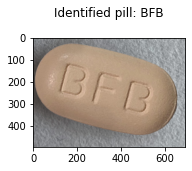



-------- 검색된 BFB의 약학정보원 결과값 ---------------------------------


BFB / CKD
제품명 벤포벨정 Benfobell Tab.
등록
(2016-03-07) BFB CKD
성분 / 함량
동일성분 의약품
Ascorbic Acid Coated　제피아스코르브산　52.1mg
Benfotiamine　벤포티아민　100mg (티아민염산염(으)로서 72.3mg)
Biotin　비오틴　10μg
Calcium Pantothenate　판토텐산칼슘　5mg
Cholecalciferol Gr.　콜레칼시페롤과립　10mg (비타민D(으)로서 1,000IU)
Cyanocobalamin(1000倍散)　시아노코발라민1000배산　100mg
Folic Acid　폴산　10μg
Inositol　이노시톨　50mg
Nicotinamide　니코틴산아미드　10mg
Pyridoxine Hydrochloride　피리독신염산염　100mg
Riboflavin　리보플라빈　100mg
Tocopherol Acetate 50%　토코페롤아세테이트2배산　40mg
Ubidecarenone　유비데카레논　2mg
Ursodeoxycholic Acid　우르소데옥시콜산　30mg
Zinc Oxide　산화아연　30mg (아연(으)로서 24mg)
γ-Oryzanol　γ-오리자놀　5mg
첨가제
첨가제 더보기
경질무수규산
미결정셀룰로오스
바닐라미크론









전문 / 일반 일반 단일 / 복합 복합
제조 / 수입사 종근당
제형 정제 투여경로 경구(내용고형)
성상 황갈색의 장방형 필름코팅정
허가일 2015년 12월 15일
대조 / 생동 해당 없음
급여정보 비급여
ATC 코드 A11JC : VITAMINS, OTHER COMBINATIONS
식약처 분류 기타의 비타민제 (319)
KPIC 약효분류
Ascorbic Acid Coated : 비타민 및 영양제류 > 수용성 비타민 > 비타민C 제제
Benfotiamine : 비타민 및 영양제류 > 수용성 비타민 > 비타민B 제제 > 비타민B1
Biot

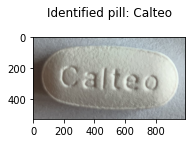



-------- 검색된 Calteo의 약학정보원 결과값 ---------------------------------


Calteo / 40
제품명 칼테오40정 Calteo-40 Tab.
변경등록
(2017-08-31) Calteo 40
변경전 Calteo 40
성분 / 함량
동일성분 의약품
Calcium Citrate　구연산칼슘　750mg (칼슘(으)로서 158mg)
Cholecalciferol　콜레칼시페롤　10μg (비타민D3(으)로서 400IU)
첨가제
첨가제 더보기
미결정셀룰로오스
산화마그네슘
산화티탄






전문 / 일반 일반 단일 / 복합 복합
제조 / 수입사 파마택코리아
제형 정제 투여경로 경구(내용고형)
성상 백색의 장방형 필름코팅정제
허가일 2004년 08월 09일
대조 / 생동 해당 없음
급여정보
675000020 - 70원/1정 급여(2017-02-01)
급여인정기준
· [일반원칙] 골다공증치료제 , 2018.12.01
· [일반원칙] 폐경기증후군에 투여하는 약제 , 2013.09.01
ATC 코드 A12AX : CALCIUM, COMBINATIONS WITH VITAMIN D AND/OR OTHER DRUGS
식약처 분류 칼슘제 (321)
KPIC 약효분류
Calcium Citrate : 비타민 및 영양제류 > 무기질(Mineral) 제제 > 대량무기질 > 칼슘(Ca)
Cholecalciferol : 비타민 및 영양제류 > 지용성 비타민 > 비타민D3 제제
KPIC 학술
 팜리뷰 일반의약품 - 비타민 D의 진면목 (2), 약학정보원(김성철), 2014-10-27
 팜리뷰 일반의약품 - 비타민 D의 진면목 (1), 약학정보원(김성철), 2014-10-20
 팜리뷰 비타민 및 주요 미네랄(3), 약학정보원(김성철), 2013-11-04
 팜리뷰 비타민 및 주요 미네랄(2), 약학정보원(김성철), 2013-10-28
제품설명서 보 기 ( 2017-09-01 게시 )
의약품안전성
정보(DUR)
상세보기
[병용금기] -
[연령금기] -
[임

In [ ]:
from selenium import webdriver
from urllib.request import urlopen
from bs4 import BeautifulSoup as bs
from urllib.parse import quote_plus
from selenium.webdriver.common.keys import Keys
import time
import requests
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os

from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException

url = 'https://www.health.kr/searchIdentity/search.asp'
# kword = input('검색어를 입력하세요 : ')
# base_url = url + quote_plus(kword)
# base_url
# search = input('input: ')

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver', chrome_options=chrome_options)
driver.get(url)
browser = driver.get(url)

response = requests.get(url)
soup = bs(response.text, "html.parser")
searches = soup.select('a')

box = driver.find_element_by_xpath('//*[@id="drug_print_front"]')

txtfile = open("/content/input.txt", 'r')
lines = txtfile.readlines()
inc = 1
print("\n-------------------- 알약 자동 인식 결과 정보 제공 ---------------------------\n")

for line in lines:
  driver.get(url)
  response = requests.get(url)
  soup = bs(response.text, "html.parser")
  searches = soup.select('a')
  box = driver.find_element_by_xpath('//*[@id="drug_print_front"]')
  print("\n >> ", line)
  if(line == " " or line == "" or line == "\n"):
    print("알약 내 문자를 인식하지 못했습니다\n")
    print("Failed to detect text on the identified pill\n")

  img = cv2.imread('/content/yolov4-custom-functions/detections/crop/testImg/pill_%s.png' %inc, cv2.IMREAD_COLOR) #여기 경로 바꾸기
  imgFile = 'pill_' + str(inc) + '.png'

  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  plotNum = 121
  plt.subplot(plotNum),plt.imshow(img),plt.title('Identified pill: %s' %line)
  plt.show()
  plotNum = plotNum + 1
  inc = inc + 1


  name = line.replace("\n","")
  box = box.send_keys(name) #box = box.send_keys("tylenol")
  checkbox = driver.find_element_by_xpath('//*[@id="frm"]/fieldset/table/tbody/tr[1]/td[1]/ul/li[1]/div/label')
  checkbox.click()
  searchButton = driver.find_element_by_xpath('//*[@id="btn_idfysearch"]').click() #엔터
  
  driver.implicitly_wait(15) # wait for loading 10seconds

  searchNum = driver.find_element_by_xpath('//*[@id="idfy_total_cnt_view"]')
  driver.implicitly_wait(5) # wait for loading 10seconds
  # print('search 결과값 갯수: ' + searchNum.text)
  searchNumText = searchNum.text

  if (searchNumText == "0" or searchNumText == "24306"):
    print("\n-------- 검색된 결과값이 없습니다 --------------\n")
    print("\n***************************************")
    print("\n********* 다시 촬영해 주세요 **********\n")
    print("***************************************\n")
    print("\n----------------------------------------------------------\n")

  else:
    result = driver.find_element_by_xpath('/html/body/div[1]/section/section/section/article[2]/article/table[1]/tbody/tr[3]/td[2]')
    pillName = line.rstrip("\n")
    print("\n\n-------- 검색된 %s의 약학정보원 결과값 ---------------------------------\n\n" %pillName)
    print(result.text) #엔터
    page = driver.find_element_by_xpath('/html/body/div[1]/section/section/section/article[2]/article/table[1]/tbody/tr[3]/td[7]').click()
    detail = driver.find_element_by_xpath('/html/body/div[1]/section/section/section/article[1]/div/a[1]').click()
    table = driver.find_element_by_xpath('/html/body/div[2]/section/section/section/article[1]/table')
    print(table.text)
    print("\n----------------------------------------------------------\n")
    # try:
    #     WebDriverWait(browser, 3).until(EC.alert_is_present(),
    #                                 'Timed out waiting for PA creation ' +
    #                                 'confirmation popup to appear.')

    #     alert = browser.switch_to.alert
    #     alert.accept()
    #     print("alert accepted")
    # except TimeoutException:
    #     print("no alert")
    #     print(table.text)